1. Get the data ready
2. divided into X & Y
3. Choose the right model
4. Fit the model with training data
5. Evaluate the model on test data

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../input/heart-disease-uci/heart.csv")
heart_disease.head()

# Create X (Features matrix)
x  = heart_disease.drop("target",axis=1)

#create Y (labals)
y= heart_disease["target"]

#2. Choose the right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf.fit(x_train, y_train)

#make a prediction
y_preds = clf.predict(x_test)

# 4. Evaluate the model on training data and test data
clf.score(x_test,y_test)

0.8032786885245902

In [2]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[23,  5],
       [ 7, 26]])

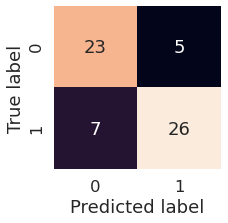

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font scale 
sns.set(font_scale=1.5)

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, 
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(conf_mat);

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [5]:
# Evaluate the predictions
final_model = evaluate_preds(y_test, y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


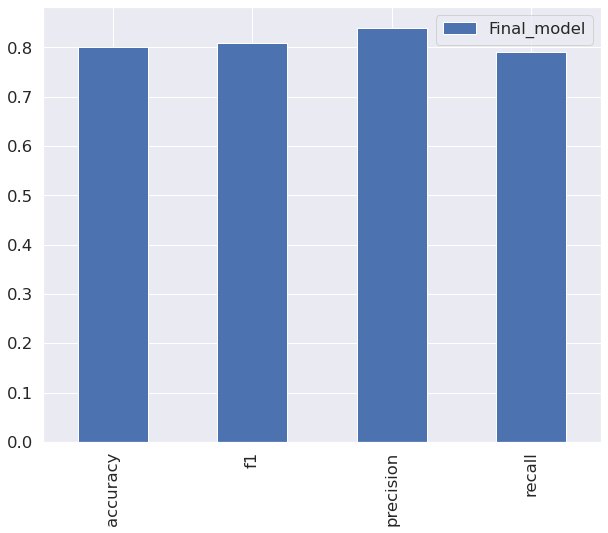

In [6]:
compare_metrics = pd.DataFrame({"Final_model":final_model})

compare_metrics.plot.bar(figsize=(10, 8));

In [7]:
import pickle

# Save an extisting model to file
pickle.dump(final_model, open("Heart-disease.pkl", "wb"))